In [1]:
from package import *

In [2]:
provider1 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider1.get_backend('ibmq_jakarta')
provider2 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
quito = provider2.get_backend('ibmq_quito')
manila = provider2.get_backend('ibmq_manila')

In [4]:
noisy_jakarta = QasmSimulator.from_backend(jakarta)
noisy_quito = QasmSimulator.from_backend(quito)
noisy_manila = QasmSimulator.from_backend(manila)

In [5]:
# manila and quito have the same set of native gates
basis = jakarta.configuration().basis_gates

# Brickwork Architecture

In [7]:
# lets take a look: 
# args: time, num_qubits
single_layer(np.pi/4, 8).draw()
#single_layer(np.pi/4, 5).decompose().draw()

┌───────────────┐                 
q0_0: ┤0              ├─────────────────
      │  circuit-2097 │┌───────────────┐
q0_1: ┤1              ├┤0              ├
      ├───────────────┤│  circuit-2097 │
q0_2: ┤0              ├┤1              ├
      │  circuit-2097 │├───────────────┤
q0_3: ┤1              ├┤0              ├
      ├───────────────┤│  circuit-2097 │
q0_4: ┤0              ├┤1              ├
      │  circuit-2097 │├───────────────┤
q0_5: ┤1              ├┤0              ├
      ├───────────────┤│  circuit-2097 │
q0_6: ┤0              ├┤1              ├
      │  circuit-2097 │└───────────────┘
q0_7: ┤1              ├─────────────────
      └───────────────┘

# Calibration

In [8]:
num_qubits = 4

In [9]:
# args: number of qubits, time, number of trotter steps, backend
test_brickwork(num_qubits, np.pi, 8, backend = sim, verbose = False)

state tomography fidelity = 0.5019 ± 0.0004


0.5018845164133862

In [6]:
steps5 = brick_steps_experiment(5, time = np.pi, min_steps = 4, max_steps = 15, backend = sim, verbose = False)
steps4 = brick_steps_experiment(4, time = np.pi, min_steps = 4, max_steps = 15, backend = sim, verbose = False)
steps3 = brick_steps_experiment(3, time = np.pi, min_steps = 4, max_steps = 15, backend = sim, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0679 ± 0.0004
5 Trotterization steps
state tomography fidelity = 0.0137 ± 0.0002
6 Trotterization steps
state tomography fidelity = 0.2117 ± 0.0004
7 Trotterization steps
state tomography fidelity = 0.4610 ± 0.0004
8 Trotterization steps
state tomography fidelity = 0.6382 ± 0.0012
9 Trotterization steps
state tomography fidelity = 0.7494 ± 0.0001
10 Trotterization steps
state tomography fidelity = 0.8183 ± 0.0007
11 Trotterization steps
state tomography fidelity = 0.8626 ± 0.0004
12 Trotterization steps
state tomography fidelity = 0.8932 ± 0.0005
13 Trotterization steps
state tomography fidelity = 0.9143 ± 0.0005
14 Trotterization steps
state tomography fidelity = 0.9292 ± 0.0002
15 Trotterization steps
state tomography fidelity = 0.9392 ± 0.0006


4 Trotterization steps
state tomography fidelity = 0.1004 ± 0.0013
5 Trotterization steps
state tomography fidelity = 0.0118 ± 0.0002
6 Trotterization steps
state tomography fidelity = 0.2

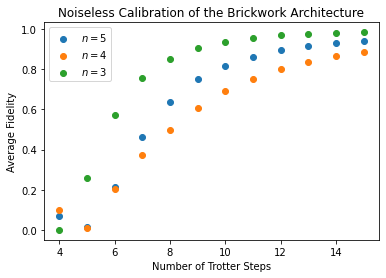

In [7]:
plt.scatter(range(4, 16), steps5, label = '$n=5$')
plt.scatter(range(4, 16), steps4, label = '$n=4$')
plt.scatter(range(4, 16), steps3, label = '$n=3$')

plt.title("Noiseless Calibration of the Brickwork Architecture")

plt.xticks(range(4, 16, 2))

plt.legend(loc='bottom right')

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

# Noisy Simulations

In [10]:
test_brickwork( 5, np.pi, 8,  noisy_manila, verbose = True)

state tomography fidelity = 0.0966 ± 0.0016


0.09661862609124178